In [6]:
from phoenix_wrapper.runner import PhoenixSolver

In [7]:
test = PhoenixSolver( working_directory="C:/Users/David Bauch/Desktop/pheonix_test/")

In [15]:
test.reset_settings()
settings = test.import_settings( parameters={
    "N": (300, 300),
    "L": (100, 100),
    #"pump": [
    #    (15, "add", 12, 12, 0, 0, "plus", 2, "none", "gauss+noDivide"),
    #    (15, "add", 12, 12, 0, 0, "plus", 2, "none", "gauss+noDivide", "time", "cos", 2000, 100, 0),
    #    (15, "add", 12, 12, 0, 0, "plus", 15, "none", "gauss+noDivide", "time", "cos", 2500, 400, 0.5),
    #],
    "pulse": [
        ( 5.6856e-3, "add", 0.5, 0.5, 0, 0, "both", 1, 0, "gauss+noDivide", "time", "iexp", 10, 1, -2),
        ( 5.6856e-3, "add", 0.5, 0.5, 0, 0, "both", 1, 0, "gauss+noDivide", "time", "iexp", 40, 1, -2),
    ],
    #"pulse": (1e-3, "add", 12, 12, 0, 0, "plus", 2, 3, "gauss+noDivide", "time", "iexp", 1000, 100, 0.2),
    "outEvery": 0.1,
    "initRandom": (1e-1, 1337),
    "output": "wavefunction,scalar",
} )
test.p_set_time(t1=100)
#test.export_settings()
test.build_runstring()

' --path ..\\..\\..\\Desktop\\pheonix_test --N 300 300 --L 100 100 --pulse 0.0056856 add 0.5 0.5 0 0 both 1 0 gauss+noDivide time iexp 10 1 -2 --pulse 0.0056856 add 0.5 0.5 0 0 both 1 0 gauss+noDivide time iexp 40 1 -2 --outEvery 0.1 --initRandom 0.1 1337 --output wavefunction,scalar --tend 100 '

In [4]:
test.p_add_envelope_assist()

Output()

In [16]:
# Progress Output
summary = test.run( precision="fp32", output_verbose=True)
print(f"Summary: {summary}")

# Minimal Output
#test.quick_run( precision="fp64")

./phoenix_repository\native_phoenix_gpu_fp32.exe --path ..\..\..\Desktop\pheonix_test --N 300 300 --L 100 100 --pulse 0.0056856 add 0.5 0.5 0 0 both 1 0 gauss+noDivide time iexp 10 1 -2 --pulse 0.0056856 add 0.5 0.5 0 0 both 1 0 gauss+noDivide time iexp 40 1 -2 --outEvery 0.1 --initRandom 0.1 1337 --output wavefunction,scalar --tend 100 


Progress:   0%|          | 0/100 [00:00<?, ?%/s]

---------------------------- Inputting System Parameters --------------------------
â„¹  | Read input 'L' as '100'
â„¹  | Read input 'L' as '100'
â„¹  | Read input output as wavefunction,scalar
â„¹  | Read input 'N_c' as '300'
â„¹  | Read input 'N_r' as '300'
â„¹  | Read input 's_t_max' as '100'
â„¹  | Halo Size for iterator 'rk4' = 4
â„¹  | Read input 'random_system_amplitude' as '0.1'
â„¹  | Read input random_seed as 1337
â„¹  | Overwritten random seed to 1337
â„¹  | Read input 'output_every' as '0.1'
â„¹  | Parsing envelope 'pulse'
â„¹  | Read input pulse_load as 0.0056856
â„¹  | Read input 'pulse_amp' as '0.0056856'
â„¹  | Read input pulse_behaviour as add
â„¹  | Read input 'pulse_width_x' as '0.5'
â„¹  | Read input 'pulse_width_y' as '0.5'
â„¹  | Read input 'pulse_X' as '0'
â„¹  | Read input 'pulse_Y' as '0'
â„¹  | Read input pulse_pol as both
â„¹  | Read input 'pulse_exponent' as '1'
â„¹  | Read input pulse_m as 0
â„¹  | Read input pulse_type as gauss+noDivide
â˜‘  | Added Spacia

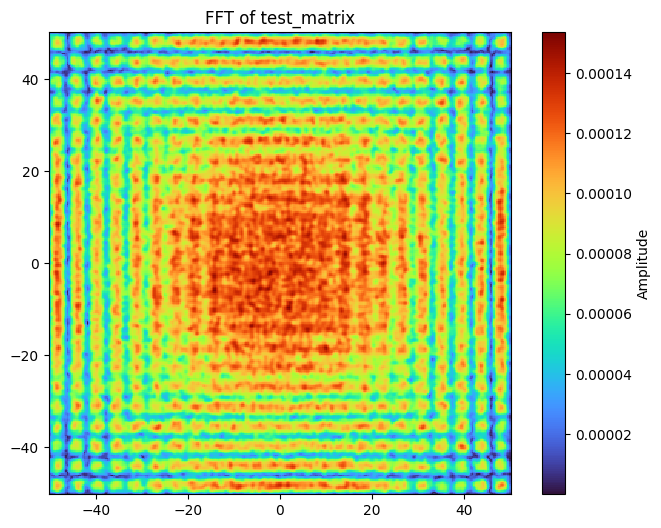

(<Figure size 1200x500 with 2 Axes>,
 array([<Axes: title={'center': 'Iteration Time'}, xlabel='Time [ps]', ylabel='Walltime [s]'>,
        <Axes: title={'center': 'Scalar Values'}, xlabel='Time [ps]', ylabel='Scalar Value'>],
       dtype=object))

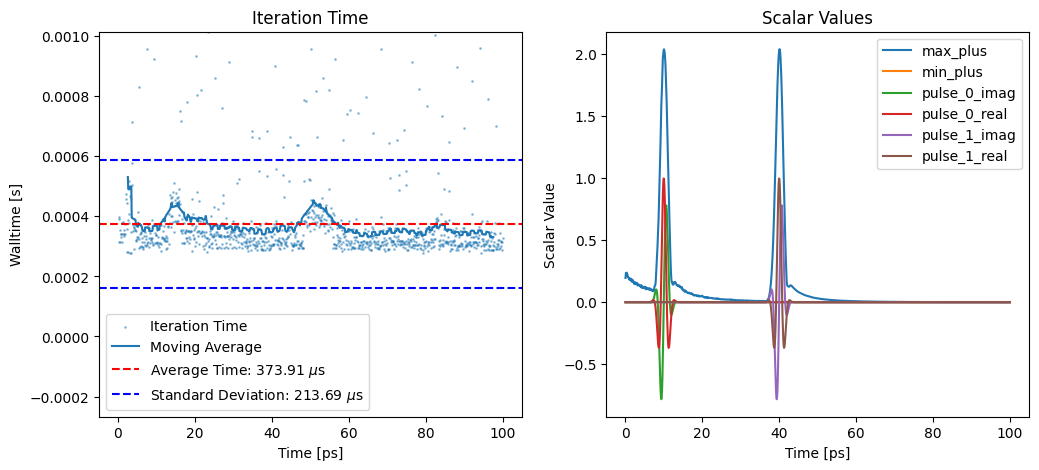

In [17]:
import numpy as np
import matplotlib.pyplot as plt
Nx,Ny = settings["parameters"]["N"]
test_matrix = np.random.rand(Nx,Ny) + 1j*np.random.rand(Nx,Ny)

test.save_matrix(test_matrix, "test_matrix.txt")

test.plot_matrix(name="wavefunction_plus.txt", use_abs=True, title="FFT of test_matrix", cblabel="Amplitude", cmap="turbo")
plt.show()

test.plot_scalar()